# Predict medical expenses using linear regression

Data Info -
#age: An integer indicating the age of the primary beneficiary
#sex: The policy holder's gender, either male or female.
#bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height
#children: An integer indicating the number of children/dependents covered by the insurance plan.
#smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
#region: The beneficiary's place of residence in the US


# Question 1- Get the data.



The data is given in Olympus with the name insurance.csv. You need to load the data with the help of pandas.

In [93]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np

In [94]:
df=pd.read_csv("insurance.csv")

In [95]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [96]:
df.shape
df.dtypes

(1338, 7)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [97]:
df["smoker"].unique()
df["region"].unique()
df_new=df

array(['yes', 'no'], dtype=object)

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [98]:
from sklearn.preprocessing import LabelEncoder
sex=LabelEncoder()
df_new['sex']=sex.fit_transform(df_new['sex'].astype(str))

region=LabelEncoder()
df_new['region']=region.fit_transform(df_new['region'].astype(str))

smoker=LabelEncoder()
df_new['smoker']=smoker.fit_transform(df_new['smoker'].astype(str))
df_new.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [99]:
df_new.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

# Question 2 - Check the distribution of expenses(charges) and state your insights.

In [100]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import seaborn as sns
import matplotlib as mat

from matplotlib import pyplot as py

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020EE7D54780>]],
      dtype=object)

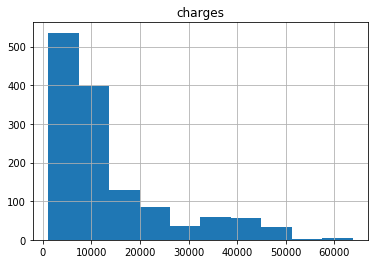

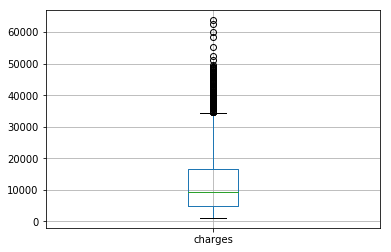

In [101]:
#Distribution of Charges
df_new.hist("charges")
py.show()

#Boxplot for Charges to see if there are any outliers
df_new[["charges"]].boxplot()
py.show()




17849.4380475

(317, 7)

(669, 7)

(1003, 7)

(1338, 7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020EE86ED358>]],
      dtype=object)

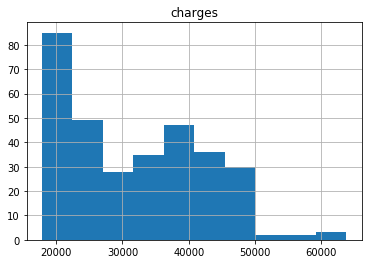

18

In [102]:
# Insights into the data

# Most of the data has insurance charges under 20000

# Data is not a normal distribution

# Data is skewed on one side

#Treating the outliers for charges
IQR = (df_new["charges"].quantile(0.75)-df_new["charges"].quantile(0.25))*1.5
IQR
#Number of outliers -- 317 rows
df_new[df_new["charges"]>IQR].shape

#Number of rows under the median -- 669
df_new[df_new["charges"]<=(df_new["charges"].quantile(0.50))].shape

#Number of rows under the 75th Percentile -- 1003
df_new[df_new["charges"]<=(df_new["charges"].quantile(0.75))].shape

#Total number of rows -- 1338
df.shape

# See the distribution of charges among the outliers
df_new[df_new["charges"]>=IQR].hist("charges")
py.show()
#Check number of rows between 75th Percentile and IQR -- Only 18 rows
np.array([np.where((df_new["charges"]<IQR) & (df_new["charges"]>(df_new["charges"].quantile(0.75))))]).shape[2]

#Based on this, it is understood that 50% percent of the data (669/1338) is under the 50th percentile
#Based on this analysis, it makes more sense if we cap the outliers (317 rows) to the IQR value instead of using a median

df_new["charges_new"]=np.where(df_new["charges"]>IQR,IQR,df_new["charges"])

,age,sex,bmi,children,smoker,region,charges,charges_new
0,19,0,27.900,0,1,3,16884.92400,16884.924000
1,18,1,33.770,1,0,2,1725.55230,1725.552300
2,28,1,33.000,3,0,2,4449.46200,4449.462000
3,33,1,22.705,0,0,1,21984.47061,17849.438047
4,32,1,28.880,0,0,1,3866.85520,3866.855200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020EE87EDC88>]],
      dtype=object)

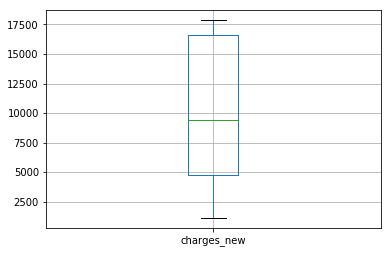

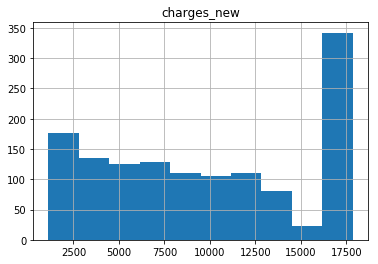

In [103]:
df_new.head()
df_new[["charges_new"]].boxplot()
df_new[["charges_new"]].hist()
df_new.drop(labels="charges",axis=1,inplace=True)

In [104]:
df_new.dtypes

age              int64
sex              int64
bmi            float64
children         int64
smoker           int64
region           int64
charges_new    float64
dtype: object

# Question 3 - Explore the relationship between variables. 

You can use corr() function or any other function to do the same.

,age,sex,bmi,children,smoker,region,charges_new
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.475529
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.012097
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.077696
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.109039
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.680196
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.047177
charges_new,0.475529,0.012097,0.077696,0.109039,0.680196,-0.047177,1.000000


C:\Users\kalya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


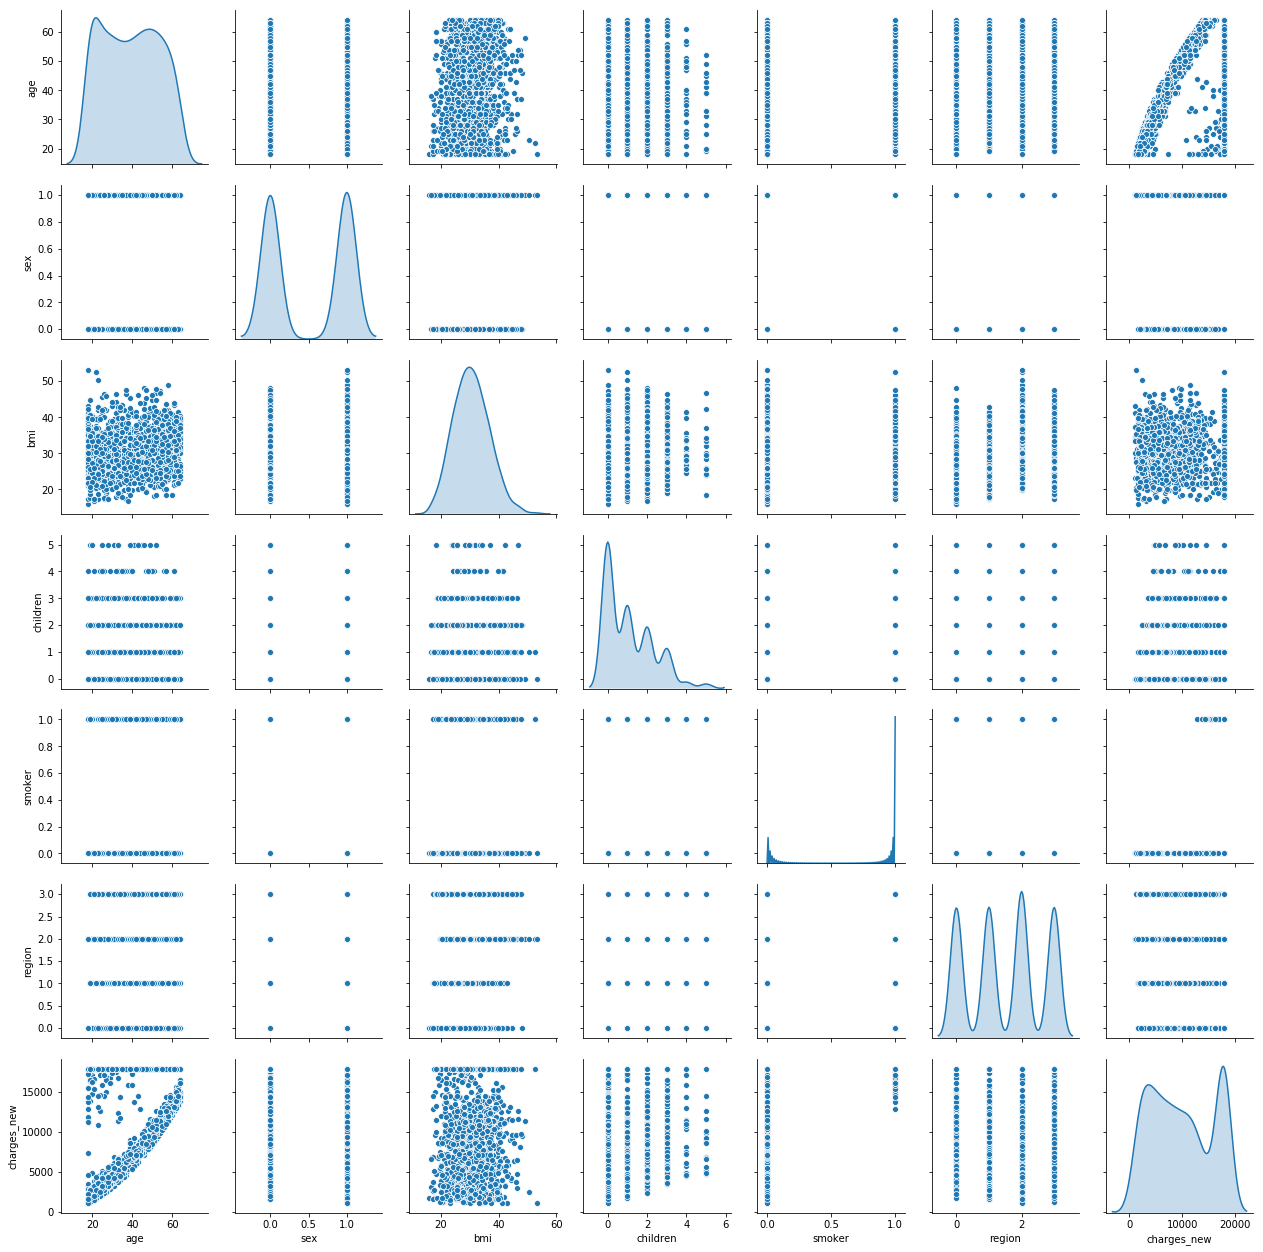

In [106]:
df_new.corr()
# Table indicates that Age and Smoker have an inpact on charges while Sex, BMI and Region have almost no impact
sns.pairplot(df_new,diag_kind="kde")
py.show()


# Question 4 - Use charges as dependent feature and Get the train and test data from your dataset.

In [107]:
x=df_new.loc[:,["age","sex","children","smoker"]]
#Removed BMI and Region as they literally have no impact 
y=df_new["charges_new"]

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=1)

# Question 5 - Create the dummies for the categorical variables/features for both train and test independent data.

You can use pd.get_dummies() function to do so.

In [109]:
x_train_dummies=pd.get_dummies(x_train)
x_test_dummies=pd.get_dummies(x_test)

# Question 6 - Train your model.

In [110]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

# Question 7 - Fit your model and get the summary of model. Print the coefficients.

In [111]:
model.fit(x_train_dummies,y_train)
#y_pred=model.predict(X_test)
coefficient=model.coef_
print(coefficient)

#Print intercept 9.718455322828262
inter=model.intercept_
print(inter)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[ 198.50403214 -497.95149278  360.36323061 9897.30145021]
-13.930393100223228


# Question 8 - Predict the charges for test data and evaluate the model performance. 

You can get the values of MAE, MSE, RMSE to show the evaluation parameters of your model

In [112]:
y_pred=model.predict(x_test_dummies)

In [113]:
x_test_dummies.shape
y_test.shape
y_pred.shape
model.score(x_test_dummies,y_test)

(268, 4)

(268,)

(268,)

0.7302558393916592

In [114]:
import math
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from math import sqrt

In [115]:
print("Mean Square Error MSE: {}".format(mse(y_test,y_pred)))
print("Mean Absolute Error MSE: {}".format(mae(y_test,y_pred)))
print("Root Mean Square Error RMSE: {}".format(sqrt(mse(y_test,y_pred))))


Mean Square Error MSE: 8857526.183805658
Mean Absolute Error MSE: 2011.5946237493924
Root Mean Square Error RMSE: 2976.1596368148093


# Naive Bayes with IRIS Data

# Question 9 - Import Iris dataset from Sklear lib and slice the data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

#### **Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

In [46]:
from sklearn import datasets

In [47]:
iris=datasets.load_iris()

In [103]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [72]:
X=pd.DataFrame(iris.data,columns=iris.feature_names)

In [73]:
y=pd.DataFrame(iris.target,columns=["Species"])

## Question 10 - Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

In [98]:
df = X.merge(y,right_index=True, left_index=True,how='outer').reset_index(inplace=False,drop=True)


C:\Users\kalya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kalya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kalya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\kalya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


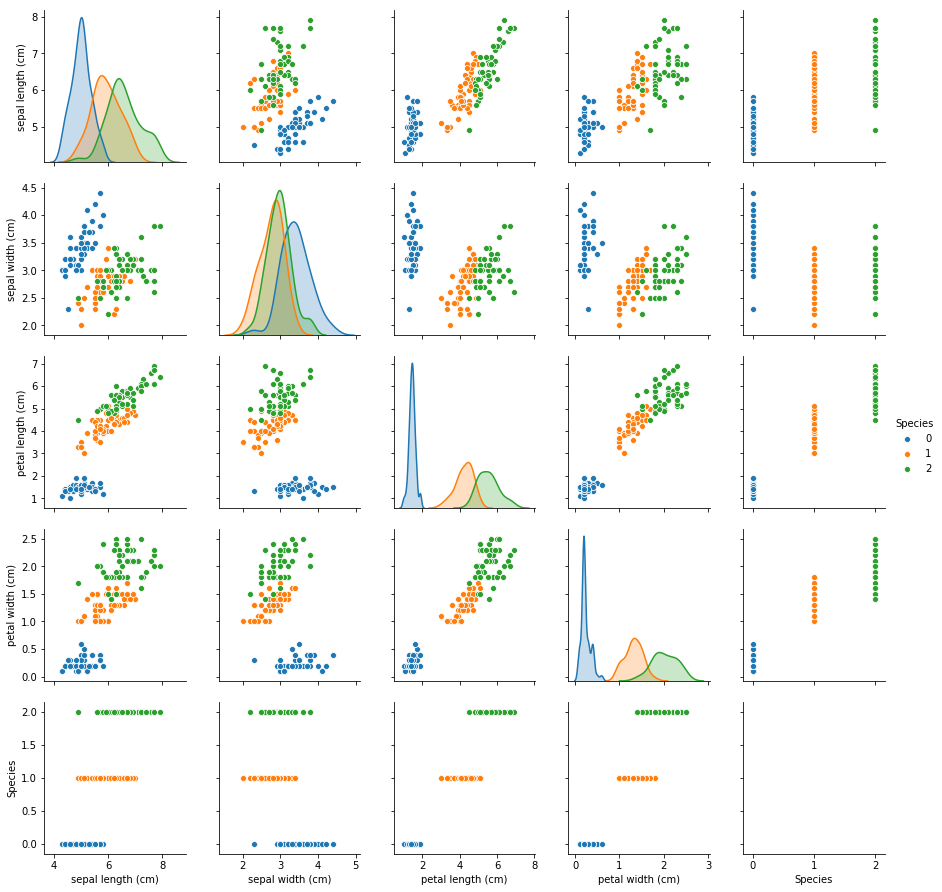

In [100]:
sns.pairplot(df,diag_kind="kde",hue="Species")

In [ ]:
#Insights into the data
#Petal Length and Petal Width can easily be used to differentiate between the species
#Data is normally distributed 
#Variables are independent 
#Sepal Width is not a good variable to identify between species 1 (versicolor) and 2 (virginica) 

## Question 11- Do Feature Scaling 

In [120]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
from sklearn import preprocessing


In [123]:
X_scale=preprocessing.scale(X)

## Question 12- Train and Fit NaiveBayes Model

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [127]:
x_train,x_test,y_train,y_test=train_test_split(X_scale,y,test_size=0.20, random_state=1)

In [161]:
nbcl = GaussianNB()
nbcl.fit(x_train, y_train)
nbcl_pred = model.predict(x_test)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

## Question 13 - Print Accuracy and Confusion Matrix and Conclude your findings

In [162]:
nbcl.score(x_test , y_test)      # performance on test data

0.9666666666666667

In [163]:
from sklearn import metrics

print(metrics.classification_report(y_test, nbcl_pred))
print(metrics.confusion_matrix(y_test, nbcl_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.92      0.96        13
          2       0.86      1.00      0.92         6

avg / total       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


# Ensemble Methods

## Question 14-  Apply the Random forest model and print the accuracy of Random forest Model


In [135]:
from sklearn.ensemble import RandomForestClassifier


C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [157]:
rfcl=RandomForestClassifier(criterion="entropy",random_state=0)

In [158]:
rfcl.fit(x_train, y_train)
rfcl_pred = model.predict(x_test)

C:\Users\kalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [159]:
rfcl.score(x_test , y_test)  

0.9666666666666667

In [160]:
print(metrics.classification_report(y_test, rfcl_pred))
print(metrics.confusion_matrix(y_test, rfcl_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.92      0.96        13
          2       0.86      1.00      0.92         6

avg / total       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


## Question 15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [150]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 51)
gbcl.fit(x_train, y_train)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=51,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [154]:
gbcl_pred = gbcl.predict(x_test)

In [155]:
gbcl.score(x_test , y_test)  

0.9666666666666667

In [156]:
print(metrics.classification_report(y_test, gbcl_pred))
print(metrics.confusion_matrix(y_test, gbcl_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.92      0.96        13
          2       0.86      1.00      0.92         6

avg / total       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
